In [1]:
import os
import sys

os.chdir('/home/mk7976/git/gaiablip') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the systxrem path to the current running directory


import dynamics_fcns as df
import dynamics_fcns_for_plot as dfp
import bh_prior_fcns

priors = bh_prior_fcns.BH_priors()

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


dynamics = df.Dynamics()
dynamics_for_plot = dfp.Dynamics()

# import PyMultiNest Solver class
from pymultinest.solve import Solver

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
# Change system path
os.chdir('/home/mk7976/git/gaiablip/analysis/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory
import analysis_fcns as af
dynamics_for_plot = dfp.Dynamics() # Functions for stellar and lens motion                

In [4]:
obs_info = pd.read_csv('./obs_info.csv', sep=",", header=None, skiprows = [0]) # Read observation info csv
obs_info.columns = ['t_obs','scan_angles'] # Specify what each column in obs_info file are
# Extrapolate info from obs_info file
t_obs = obs_info['t_obs'].to_numpy() # Observation times [Julian years]
scan_angles = obs_info['scan_angles'].to_numpy() #  Scan angles [rad]
t_ref = 2017.5 # Reference time for calculating displacement [Julian years]
n_obs = len(t_obs) # Number of observations

In [5]:
scan_angles = np.array([3.448296944257913,3.448296944257913,4.493667318642264,4.493667318642264,3.787273988239316,3.787273988239316,3.4236020095353483,3.4236020095353483,2.661901610522322,2.661901610522322,4.058272401214204,4.058272401214204,2.749441536415439,2.749441536415439,5.603175015853413,5.603175015853413,6.054871697856187,6.054871697856187,2.4092341172487513,2.4092341172487513,4.974555126607196,4.974555126607196,3.3231447888333756,3.3231447888333756,3.5691292400886723,3.5691292400886723,5.815695198095265,5.815695198095265,0.44633271714891726,0.44633271714891726,0.5474495357095673,0.5474495357095673,0.1270359377317719,0.1270359377317719,5.231504780012941,5.231504780012941,4.889303064250705,4.889303064250705,5.466447546932162,5.466447546932162,6.148840389253347,6.148840389253347,5.021261348793251,5.021261348793251,2.899560348474227,2.899560348474227,4.904209452268042,4.904209452268042,0.7431401348347824,0.7431401348347824,4.020742358960453,4.020742358960453,0.9007152691844127,0.9007152691844127,5.935529859755197,5.935529859755197,3.2788697077963755,3.2788697077963755,2.605397808795041,2.605397808795041,1.662251934907694,1.662251934907694,4.864653741776513,4.864653741776513,2.866077065248105,2.866077065248105,3.5715758356335643,3.5715758356335643,0.1180597980265432,0.1180597980265432,3.880718280419711,3.880718280419711,3.8459108515969884,3.8459108515969884,3.8763106246630494,3.8763106246630494,5.9297440606020535,5.9297440606020535,4.284003285463798,4.284003285463798])

In [6]:
blip_search = af.blip_search('bh')

In [7]:
catalog_list = os.listdir('/scratch/mk7976/epoch_astrometry/lens_new')

In [8]:
sig_catalogs = ['459543-459553','711445-712016','757503-757838','462468-462482','650893-651194','674298-674314']
sig_ids = [4042201774850362496,6262458554071571712,6664358989221213184,4068042664558486272,5727504125199235456,5931325238592343680]

catalog number: 459543-459553
source_id: 4042201774850362496


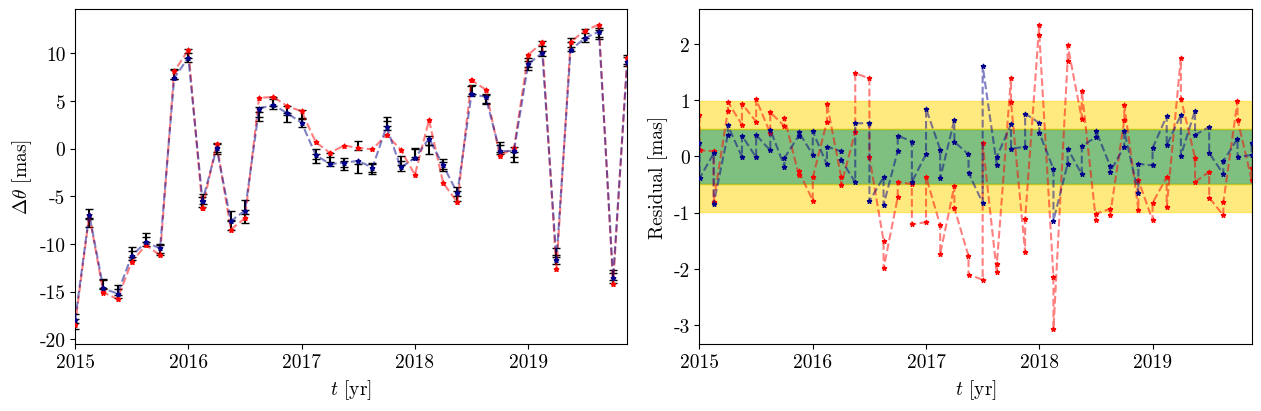

catalog number: 711445-712016
source_id: 6262458554071571712


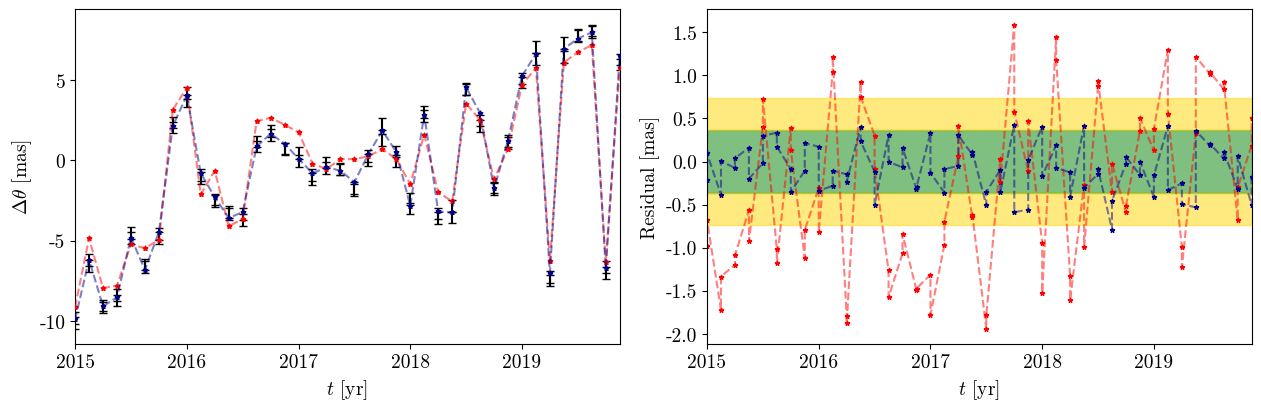

catalog number: 757503-757838
source_id: 6664358989221213184


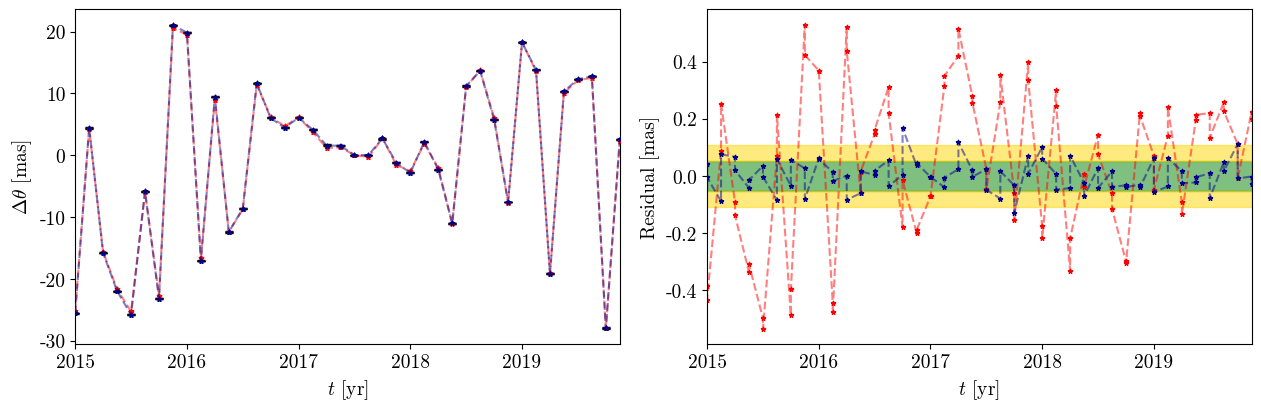

catalog number: 462468-462482
source_id: 4068042664558486272


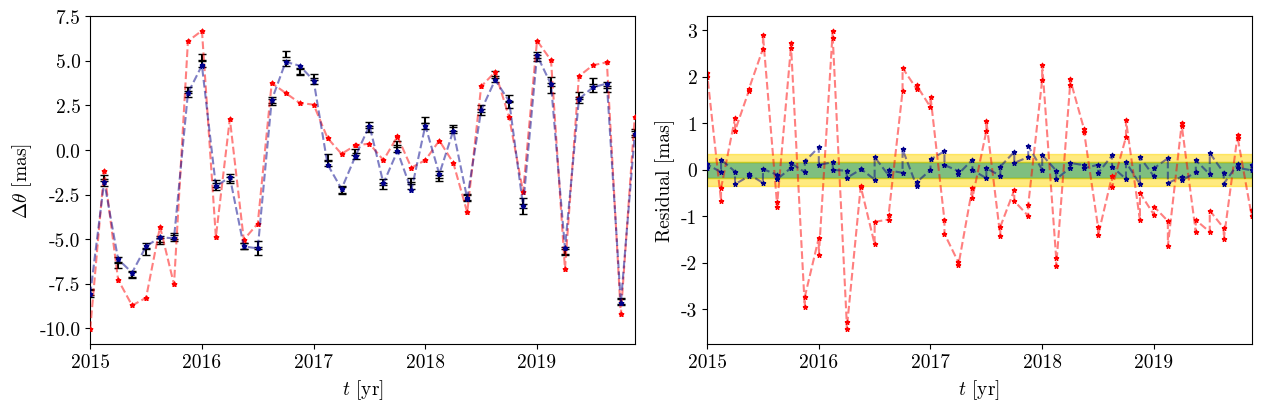

catalog number: 650893-651194
source_id: 5727504125199235456


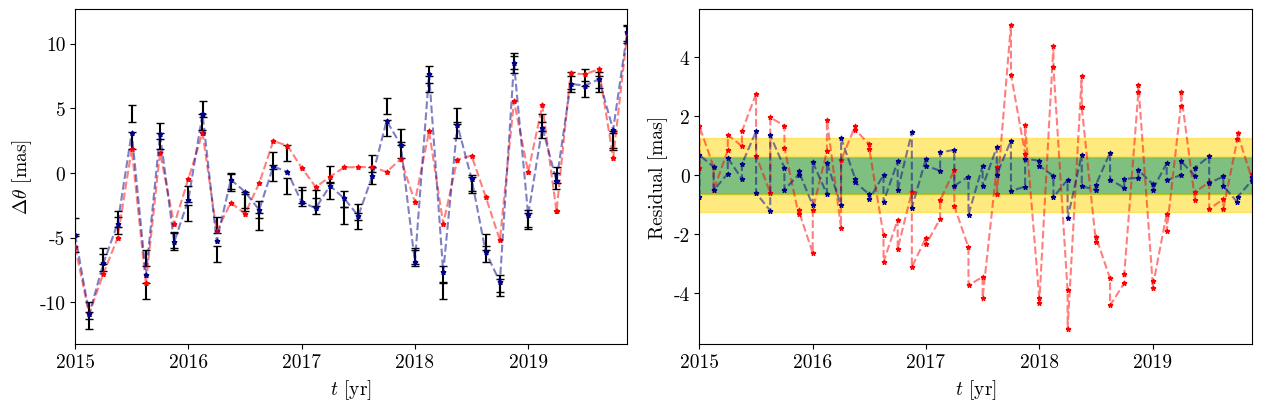

catalog number: 674298-674314
source_id: 5931325238592343680


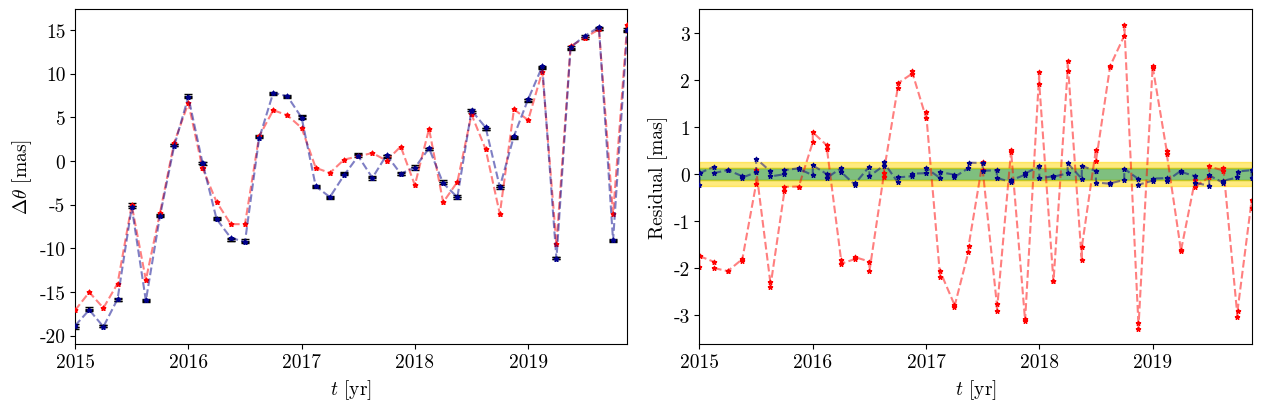

In [9]:
os.chdir('/home/mk7976/git/gaiablip/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

results_list = os.listdir('/scratch/mk7976/fit_results/x1_new/blip_multinest_results')
for catalog_number in sig_catalogs:
    
    print('catalog number:',catalog_number)
    
    catalog_name = 'gaia_epoch_lensed_'+catalog_number+'_new.pkl'

    catalog_info_name = 'gaia_info_'+catalog_number+'.csv'

    data = pd.read_pickle('/scratch/mk7976/epoch_astrometry/lens_new/'+catalog_name) 
    catalog_id_list = list(data['source_id'])
    
    misc_info_folder = '/scratch/ic2127/gaia_edr3_info/' # Specify the location of the folder containing the file with parallax and g magnitude data
    misc_info_data = pd.read_csv(misc_info_folder+catalog_info_name) # Load in file containing parallax and g magnitude information
        
    results = pd.read_csv('/scratch/mk7976/fit_results/x1_new/blip_multinest_results/blip_'+catalog_number+'.csv')
    free_results = pd.read_csv('/scratch/mk7976/fit_results/x1_new/free_multinest_results/free_'+catalog_number+'.csv')
    
    for m in range(np.size(results['s_id'])):
        results_row = results.iloc[m]
        source_id = results.iat[m,0]
        for sig_id in sig_ids:
            if source_id == sig_id:

                print('source_id:',source_id)

                x0 = results_row[1]
                x1 = results_row[2]
                x2 = results_row[3]
                x3 = results_row[4]
                x4 = results_row[5]
                x5 = results_row[6]
                x6 = results_row[7]
                x7 = results_row[8]
                x8 = results_row[9]
                x9 = results_row[10]
                x10 = results_row[11]
                        
                x = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10])
                
                source_idx = catalog_id_list.index(source_id)
                source_row = data.iloc[source_idx] # Pick particular RA row corresponding to source of interest
                source_info_row = misc_info_data.iloc[source_idx] # Pick the particular data file row corresponding to the source of interest
    
                free_results_row = free_results.iloc[source_idx]
    
                y0 = results_row[1]
                y1 = results_row[2]
                y2 = results_row[3]
                y3 = results_row[4]
                y4 = results_row[5]
                
                y = np.array([y0,y1,y2,y3,y4])
                
                source_id = data.iat[source_idx,0] # Specify the source ID
                source_ra0 = float(source_row[1]) # RA of source at first observation epoch [deg]
                source_dec0 = float(source_row[2]) # DEC of source at first observation epoch [deg]
                source_ddefl_noerr = np.array(source_row[3:]) # Change in RA [mas]
                source_dist = float(source_info_row[3]) # Estimated distance to source [pc]
                source_gmag = float(source_info_row[6]) # G magntiude of source
                
                d_ra_l = (x[5]-x[0])/3600/1000/np.cos(source_dec0*np.pi/180) # [deg]
                d_dec_l = (x[6]-x[1])/3600/1000 # [deg]
                
                seed_info = pd.read_csv('/scratch/mk7976/seed_lists/'+catalog_number+'_seeds.csv')
                
                np.random.seed(int(seed_info.iat[source_idx,2])) # Set a random seed to ensure data gets scrambled in the same way every time, based on the source distance
                
                source_ddefl_err = blip_search.disp_err(source_gmag)
                source_ddefl = source_ddefl_noerr
                source_ddefl = np.random.normal(loc = source_ddefl_noerr,scale = source_ddefl_err) # Scramble data according to a normal distribution with 1 sigma = source_ddec_err [mas]
                
                ddefl = source_ddefl
                err = source_ddefl_err
                
                ra0 = source_ra0
                dec0 = source_dec0
            
                # Extract model parameters from parameter array
                d_ra_l = x[5]/3600/1000/np.cos(dec0*np.pi/180) # [deg]
                d_dec_l = x[6]/3600/1000 # [deg]
                
                # Compute the AL location of the source according to the lensed model
                al_traj = dynamics.lensed_AL(ra0,dec0,x[2],x[3],x[4],
                    ra0+d_ra_l,dec0+d_dec_l,x[7],x[8],x[9],x[10]) # [mas]
                
                # Compute the AL offset
                al_offset = np.sin(scan_angles)*x[0]+np.cos(scan_angles)*x[1] # [mas]
                
                # Compute the difference in AL coordinates between the data and the unlensed model
                sl_ddefl = al_traj+al_offset # [mas]
                
                al_nolens_offset = np.sin(scan_angles)*x[0]+np.cos(scan_angles)*x[1] # [mas]
                al_no_lens_offset = np.sin(scan_angles)*y[0]+np.cos(scan_angles)*y[1] # [mas]
                
                nolens_ddefl = dynamics.unlens_AL(ra0,dec0,x[2],x[3],x[4]) + al_nolens_offset 
                no_lens_ddefl = dynamics.unlens_AL(ra0,dec0,y[2],y[3],y[4]) + al_no_lens_offset 
                
                parallax = (1/x[4])*1000
                mura = x[2]
                mudec = x[3]
                alphadeg = ra0
                deltadeg = dec0
            
                ############
                ############
                
                # Unlensed log likelihood
                twoll_no_lens = blip_search.free_2ll(source_ddefl,source_ddefl_err,ra0,dec0,y)
                
                # Lensed 
                
                ts = results_row[12]
                ts_lens = blip_search.llr(source_ddefl,source_ddefl_err,twoll_no_lens,ra0,dec0,x)
                                
                if True: # Plotting
                                        
    
                    fig, axd = plt.subplot_mosaic([['left', 'right']],
                              figsize=(12.5, 4), constrained_layout=True)
                
                    axd['left'].errorbar(t_obs,source_ddefl,np.ones(80)*source_ddefl_err,color='black',label='Catalog Path',alpha=1.0,linestyle='',capsize=3, elinewidth=1.5,zorder=0)
                    #ax_lens.plot(t_obs,nolens_ddefl,color='lightsteelblue',label='BF Source Path',linestyle='--')
                    
                    axd['left'].scatter(t_obs,sl_ddefl,color = 'darkblue',marker='*',zorder=21,s=10)
                    axd['left'].scatter(t_obs,no_lens_ddefl,color='red',alpha=1.0,marker='*',zorder=10,s=10)  
                    
                    axd['left'].plot(t_obs,no_lens_ddefl,color='red',linestyle='--',alpha=0.5,zorder=9)            
                    axd['left'].plot(t_obs,sl_ddefl,color = 'darkblue',linestyle='--',alpha=0.5,zorder=20)
                    
                    axd['left'].set_xlabel(r'$t$ [yr]')
                    axd['left'].set_ylabel(r'$\Delta \theta$ [mas]')
                    axd['left'].set_xlim(t_obs[0],t_obs[-1])
    
                    axd['right'].set_xlabel('$t$ [yr]')
                    axd['right'].set_ylabel('Residual [mas]')
                    axd['right'].fill_between(t_obs,-1*source_ddefl_err[0],1*source_ddefl_err[0],color='green',alpha=0.5)
                    axd['right'].fill_between(t_obs,1*source_ddefl_err[0],2*source_ddefl_err[0],color='gold',alpha=0.5)
                    axd['right'].fill_between(t_obs,-2*source_ddefl_err[0],-1*source_ddefl_err[0],color='gold',alpha=0.5)

                    axd['right'].scatter(t_obs,(source_ddefl-sl_ddefl),color='darkblue',marker='*',zorder=21,s=10)
                    axd['right'].plot(t_obs,(source_ddefl-sl_ddefl),color='darkblue',linestyle='--',alpha=0.5,zorder=20)
    
                    axd['right'].scatter(t_obs,(source_ddefl-no_lens_ddefl),color='red',marker='*',s=10)
                    axd['right'].plot(t_obs,(source_ddefl-no_lens_ddefl),color='red',linestyle='--',alpha=0.5)
                    axd['right'].set_xlim(t_obs[0],t_obs[-1])
            
                    ####
                
                    mas2deg = 2.7777776630942e-7
                    
                    lensed=dynamics_for_plot.lensed_2d(source_ra0,source_dec0,x[2],x[3],x[4],source_ra0+(x[5])*mas2deg,source_dec0+(x[6])*mas2deg,x[7],x[8],x[9],x[10])
                    lensed_coarse=dynamics.lensed_2d(source_ra0,source_dec0,x[2],x[3],x[4],source_ra0+(x[5])*mas2deg,source_dec0+(x[6])*mas2deg,x[7],x[8],x[9],x[10])
    
                    unlensed=dynamics_for_plot.unlens_2d(source_ra0,source_dec0,y[2],y[3],y[4])
                    unlensed_coarse=dynamics.unlens_2d(source_ra0,source_dec0,y[2],y[3],y[4])
                    
                    true_source_path=dynamics_for_plot.unlens_2d(source_ra0,source_dec0,x[2],x[3],x[4])
                    true_source_path_coarse=dynamics.unlens_2d(source_ra0,source_dec0,x[2],x[3],x[4])
    
                    true_lens_path=dynamics_for_plot.unlens_2d(source_ra0+(x[5])*mas2deg,source_dec0+(x[6])*mas2deg,x[7],x[8],x[9])
                    true_lens_path_coarse=dynamics.unlens_2d(source_ra0+(x[5])*mas2deg,source_dec0+(x[6])*mas2deg,x[7],x[8],x[9])

                    plt.show()